# Setup

In [2]:
############################################################################################################################ 
# Get the latest CREST files for each ID within the target folder (dirname)

from pathlib import Path
import json
from sqlite3 import connect as sqlite3_connect
from sqlite3 import DatabaseError
from igraph import Graph as ig_Graph
from igraph import plot as ig_plot
from scipy.spatial.distance import cdist
from random import choice as random_choice
from itertools import combinations
from numpy import array, unravel_index, argmin, mean
import random
import numpy as np
from copy import deepcopy
import itertools
from datetime import datetime
from time import time
import neuroglancer
from webbrowser import open as wb_open
from webbrowser import open_new as wb_open_new
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm

# from eCREST_cli_beta import ecrest, import_settings
from eCREST_cli import ecrest, import_settings, get_cell_filepaths

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


The 'ecrest' class has been imported from eCREST_cli.py

An instance of this object will be able to:
- open an neuroglancer viewer for proofrieading (see "Proofread using CREST")
    - add-remove segments (using graph feature for efficiency)
    - format itself and save itself as a CREST-style .json
- convert from neuroglancer json (see "Convert From Neuroglancer to eCREST")
    - format itself and save itself as a CREST-style .json
    


### Import settings

If you save a copy of settings_dict.json (found in the "under construction" directory of eCREST repo) locally somewhere outside the repo (like in your save_dir), then you can use the following code cell to import. This avoids needing to re-type the save_dir and db_path each time you "git pull" updates from the repo to this notebook.

In [3]:
path_to_settings_json = '/Users/kperks/Documents/ell-connectome/eCREST-local-files/settings_dict.json'
settings_dict = import_settings(path_to_settings_json)

In [4]:
# directory_path = Path(settings_dict['save_dir'])
directory_path = Path('/Users/kperks/Library/CloudStorage/GoogleDrive-kperky@gmail.com/.shortcut-targets-by-id/16q1BuOMfD2ta0Cwq8CjMlRe4rDvbuWC5/ELL_connectome/Mark_C/Spine_Density_Annotation/')#returned from main network folder/')#474111084/')
cell_filepaths = get_cell_filepaths(directory_path) # gets filepaths for all cells in a directory"

In [7]:
cell_filepaths

{'128832297': PosixPath('/Users/kperks/Library/CloudStorage/GoogleDrive-kperky@gmail.com/.shortcut-targets-by-id/16q1BuOMfD2ta0Cwq8CjMlRe4rDvbuWC5/ELL_connectome/Mark_C/Spine_Density_Annotation/cell_graph_128832297__2023-09-26 23.25.25.json'),
 '128895794': PosixPath('/Users/kperks/Library/CloudStorage/GoogleDrive-kperky@gmail.com/.shortcut-targets-by-id/16q1BuOMfD2ta0Cwq8CjMlRe4rDvbuWC5/ELL_connectome/Mark_C/Spine_Density_Annotation/cell_graph_128895794__2023-10-05 12.56.18.json'),
 '135362225': PosixPath('/Users/kperks/Library/CloudStorage/GoogleDrive-kperky@gmail.com/.shortcut-targets-by-id/16q1BuOMfD2ta0Cwq8CjMlRe4rDvbuWC5/ELL_connectome/Mark_C/Spine_Density_Annotation/cell_graph_135362225__2023-08-02 11.11.24.json'),
 '213528973': PosixPath('/Users/kperks/Library/CloudStorage/GoogleDrive-kperky@gmail.com/.shortcut-targets-by-id/16q1BuOMfD2ta0Cwq8CjMlRe4rDvbuWC5/ELL_connectome/Mark_C/Spine_Density_Annotation/cell_graph_213528973__2024-04-01 18.38.22.json'),
 '214581797': PosixPath(

# Get annotations

In [5]:
cellids = ['213528973','556969316','474111084','562815622','567566839']

In [6]:
anno_loc = 'spineD loc'
anno_pts = 'spineD pts'
vx_sizes = [16, 16, 30]
'''assumes that the annotation is a point annotation stored in the list as ([x,y,z,segment_id],'annotatePoint')
                previous ot Jan 25 2024, it was just [x,y,z,segment_id]'''

data = []

for id_ in cellids:
    # id_ = cellids[0]
    
    cell = ecrest(settings_dict,filepath = cell_filepaths[id_])
    
    ctype = cell.get_ctype("manual")
    

    
    for loc_ in cell.cell_data['end_points'][anno_loc]:
        x,y,z = [p/1000 for p in loc_[0]]             
    
        d = [np.linalg.norm(np.array(pt_[0]) - np.array(loc_[0])) for pt_ in cell.cell_data['end_points'][anno_pts] if (np.linalg.norm(np.array(pt_[0]) - np.array(loc_[0])))<5100]
        
        data.append({'id': id_, 'cell_type': ctype, 'x': x, 'y': y, 'z': z, 'n': len(d)})#, ignore_index=True)

df = pd.DataFrame(data)

KeyError: '562815622'

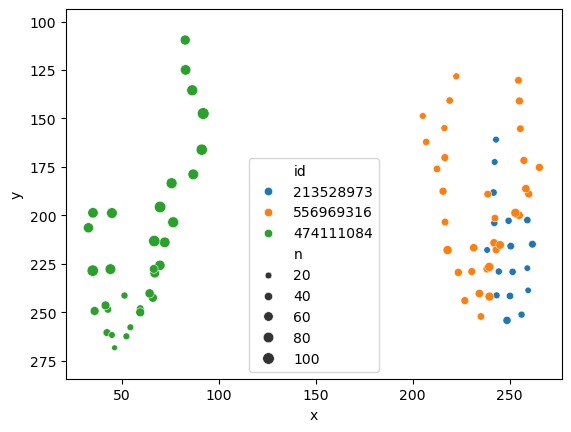

In [74]:
ax = sns.scatterplot(data=df,x='x',y='y',size='n',hue='id')
ax.set_aspect('equal', adjustable='datalim')
ax.invert_yaxis()

<Axes: xlabel='n', ylabel='Density'>

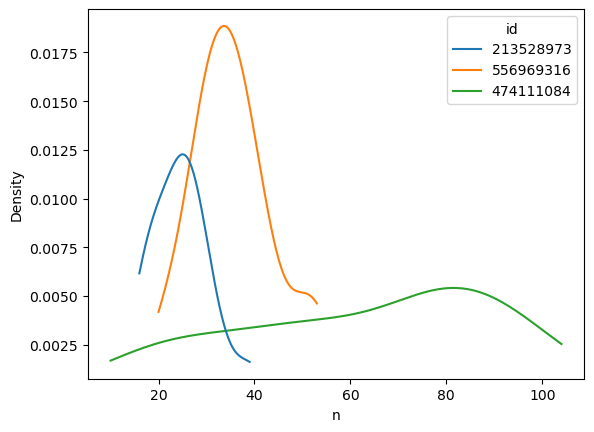

In [73]:
sns.kdeplot(data=df,x='n',hue='id',cut=0)

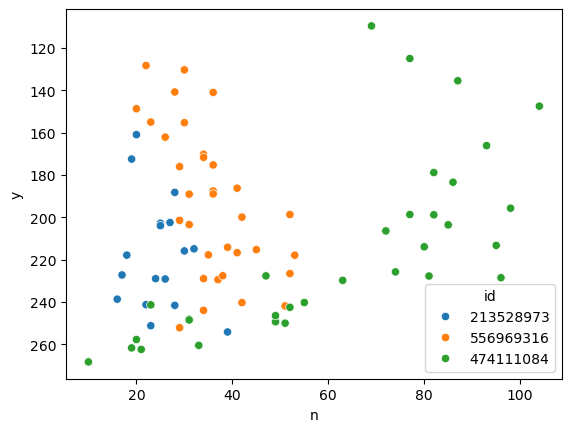

In [71]:
ax = sns.scatterplot(data=df,x='n',y='y',hue='id')
# ax.set_aspect('equal', adjustable='datalim') 
ax.invert_yaxis()